In [86]:
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

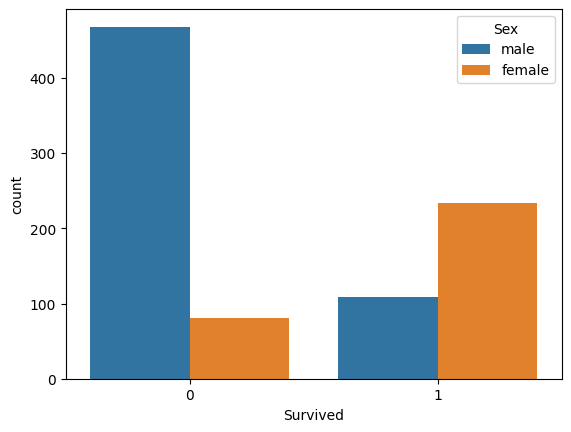

In [88]:
import seaborn as sb
sb.countplot(x="Survived", data=data, hue="Sex")

In [89]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

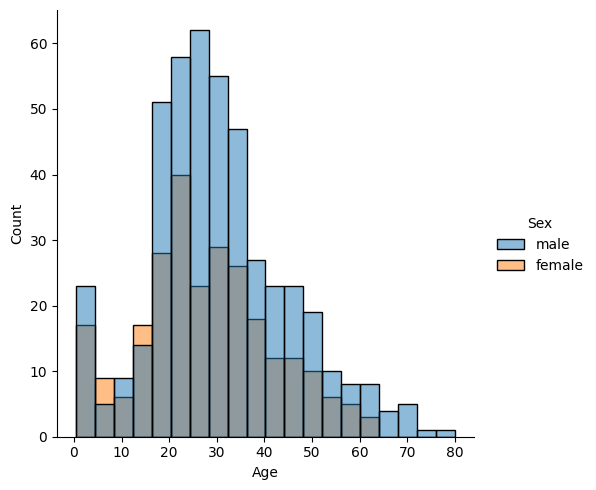

In [90]:
sb.displot(x="Age", data=data, hue="Sex")

In [91]:
data["Age"].mean()

29.69911764705882

In [92]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [93]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
data = data.drop(["Cabin"] , axis=1)


In [95]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
data = data.dropna()

In [97]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [98]:
data = data.drop(["Name","Ticket","PassengerId"], axis=1)

In [99]:
dummies_sex = pd.get_dummies(data["Sex"] , drop_first=True)


In [100]:
data = data.join(dummies_sex)

In [101]:
data = data.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

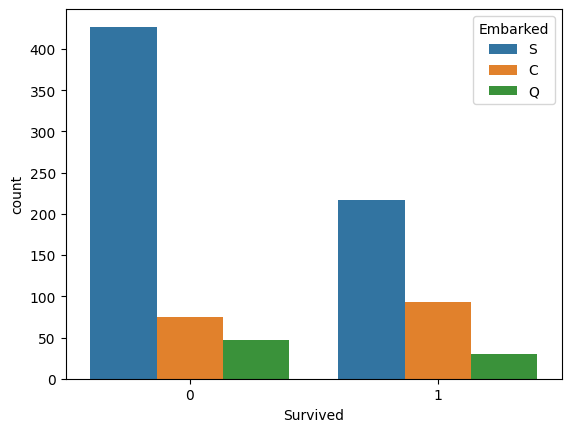

In [102]:
sb.countplot(x="Survived" , data=data , hue="Embarked")

In [103]:
dummies_embarked = pd.get_dummies(data["Embarked"],drop_first=True)
data = data.join(dummies_embarked)
data = data.drop(["Embarked"],axis=1)


<Axes: >

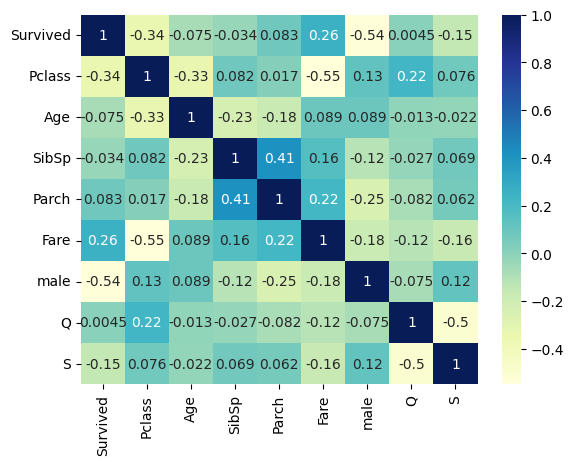

In [104]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

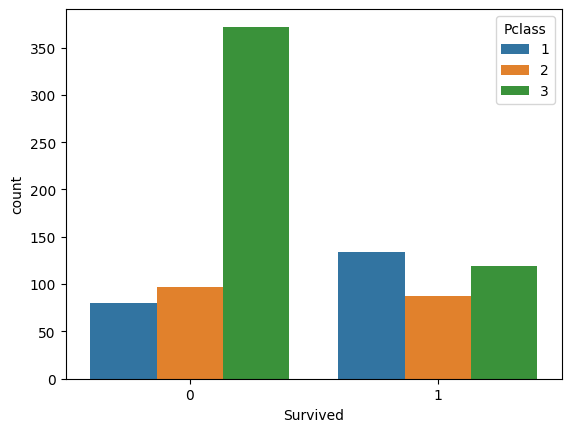

In [105]:
sb.countplot(x="Survived",data=data,hue="Pclass")

In [106]:
X = data.drop(["Survived"], axis=1)
Y = data["Survived"]

In [107]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=.2)

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
result=[]
for i in range(1,25):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(x_train,y_train)
  predict = model.predict(x_test)
  score = accuracy_score(y_test,predict)
  print(score,"max_depth: ",i)
  result.append(score)

0.8314606741573034 max_depth:  1
0.7808988764044944 max_depth:  2
0.8595505617977528 max_depth:  3
0.8595505617977528 max_depth:  4
0.8539325842696629 max_depth:  5
0.8370786516853933 max_depth:  6
0.8314606741573034 max_depth:  7
0.8089887640449438 max_depth:  8
0.8089887640449438 max_depth:  9
0.8033707865168539 max_depth:  10
0.797752808988764 max_depth:  11
0.797752808988764 max_depth:  12
0.7752808988764045 max_depth:  13
0.797752808988764 max_depth:  14
0.7865168539325843 max_depth:  15
0.7865168539325843 max_depth:  16
0.7696629213483146 max_depth:  17
0.7752808988764045 max_depth:  18
0.7808988764044944 max_depth:  19
0.7752808988764045 max_depth:  20
0.7696629213483146 max_depth:  21
0.7752808988764045 max_depth:  22
0.7696629213483146 max_depth:  23
0.7808988764044944 max_depth:  24


<Axes: >

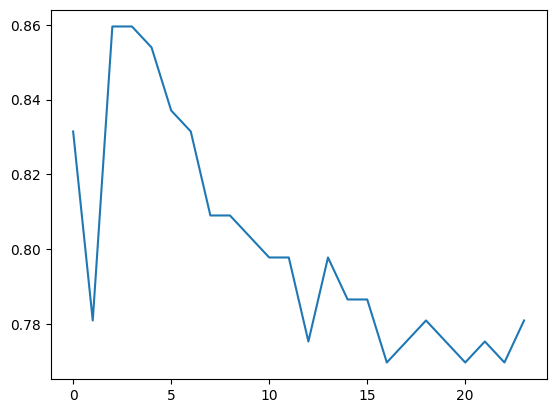

In [116]:
sb.lineplot(data=result)

In [117]:
  model = DecisionTreeClassifier(max_depth=4)
  model.fit(x_train,y_train)
  predict = model.predict(x_test)

In [121]:
x_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.5, 0.9, 'male <= 0.5\n0.474\n711\n[437, 274]\ndied'),
 Text(0.25, 0.7, 'Pclass <= 2.5\n0.391\n244\n[65, 179]\nsurvived'),
 Text(0.125, 0.5, 'Fare <= 22.0\n0.06\n130\n[4, 126]\nsurvived'),
 Text(0.0625, 0.3, 'Age <= 56.0\n0.191\n28\n[3, 25]\nsurvived'),
 Text(0.03125, 0.1, '0.137\n27\n[2, 25]\nsurvived'),
 Text(0.09375, 0.1, '0.0\n1\n[1, 0]\ndied'),
 Text(0.1875, 0.3, 'Age <= 49.5\n0.019\n102\n[1, 101]\nsurvived'),
 Text(0.15625, 0.1, '0.0\n90\n[0, 90]\nsurvived'),
 Text(0.21875, 0.1, '0.153\n12\n[1, 11]\nsurvived'),
 Text(0.375, 0.5, 'Fare <= 22.904\n0.498\n114\n[61, 53]\ndied'),
 Text(0.3125, 0.3, 'Age <= 36.5\n0.493\n93\n[41, 52]\nsurvived'),
 Text(0.28125, 0.1, '0.483\n88\n[36, 52]\nsurvived'),
 Text(0.34375, 0.1, '0.0\n5\n[5, 0]\ndied'),
 Text(0.4375, 0.3, 'Parch <= 4.5\n0.091\n21\n[20, 1]\ndied'),
 Text(0.40625, 0.1, '0.0\n16\n[16, 0]\ndied'),
 Text(0.46875, 0.1, '0.32\n5\n[4, 1]\ndied'),
 Text(0.75, 0.7, 'Age <= 13.0\n0.324\n467\n[372, 95]\ndied'),
 Text(0.625, 0.5, 'SibS

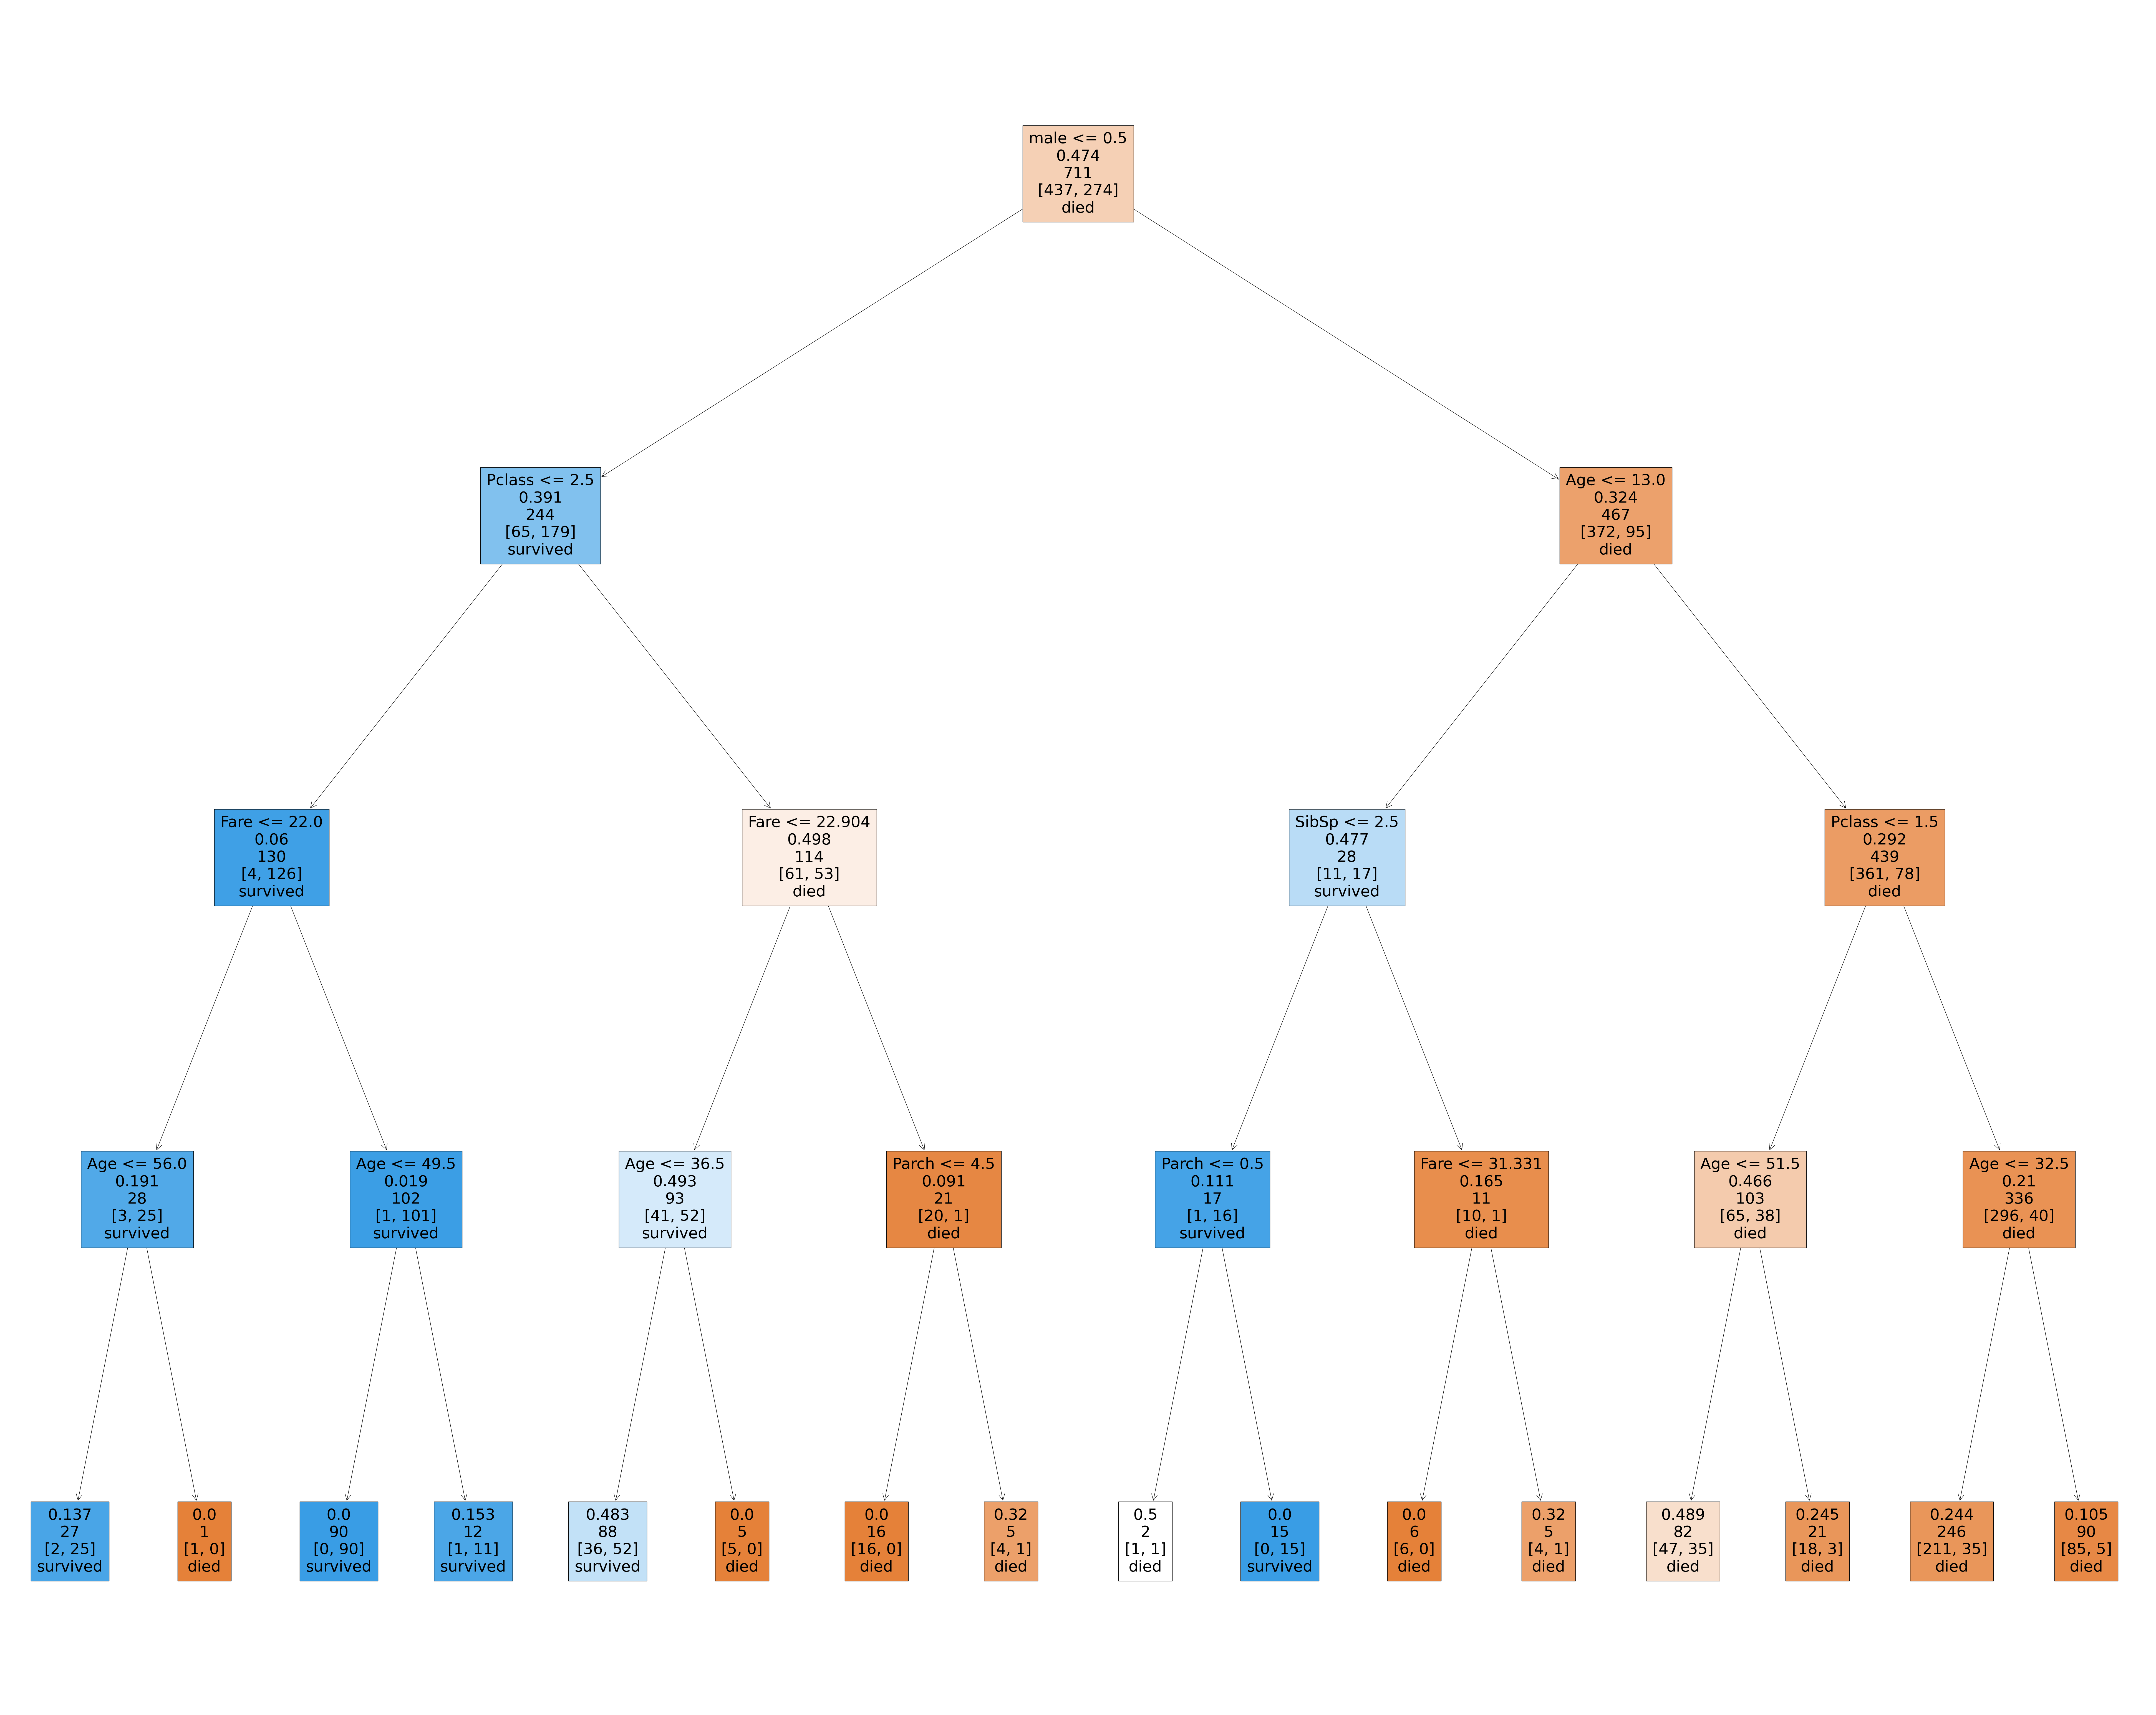

In [126]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(100,80))
plot_tree(
    model,
    feature_names=x_train.columns,
    class_names=["died","survived"], # asendent order , 0=died , 1 = survuived
    filled=True , label="none"
)